<a href="https://colab.research.google.com/github/unfreaked/codsoft/blob/main/ResumeParser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-docx PyPDF2 nltk spacy pdf2image pytesseract
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 142.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import re
import nltk
import spacy
from docx import Document
from PyPDF2 import PdfReader
from pdf2image import convert_from_path
import pytesseract
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Load the English language model for spaCy
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [3]:
def extract_text_from_pdf(pdf_path):
    text = ""
    pdf_reader = PdfReader(pdf_path)
    for page in pdf_reader.pages:
        text += page.extract_text()
    return text

def extract_text_from_docx(docx_path):
    doc = Document(docx_path)
    return "\n".join([paragraph.text for paragraph in doc.paragraphs])

def extract_text_from_image_pdf(pdf_path):
    images = convert_from_path(pdf_path)
    text = ""
    for image in images:
        text += pytesseract.image_to_string(image)
    return text

In [4]:
def extract_name(text):
    # Use spaCy to find person names
    doc = nlp(text)
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            return entity.text
    return "Name not found"

def extract_email(text):
    email = re.findall(r'[\w\.-]+@[\w\.-]+', text)
    return email[0] if email else "Email not found"

def extract_phone(text):
    phone = re.findall(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', text)
    return phone[0] if phone else "Phone not found"

def extract_skills(text, skill_keywords):
    skills = []
    for skill in skill_keywords:
        if skill.lower() in text.lower():
            skills.append(skill)
    return skills if skills else ["No skills detected"]

def extract_education(text):
    education = []
    education_keywords = ['bachelor', 'master', 'phd', 'doctorate', 'bs', 'ms', 'mba', 'btech']

    sentences = sent_tokenize(text)
    for sentence in sentences:
        for word in education_keywords:
            if word in sentence.lower():
                education.append(sentence)
                break

    return education if education else ["Education not specified"]

In [5]:
common_skills = [
    'Python', 'Java', 'C++', 'JavaScript', 'HTML', 'CSS',
    'SQL', 'Machine Learning', 'Data Analysis', 'Project Management',
    'Communication', 'Teamwork', 'Problem Solving', 'AWS', 'Azure',
    'Docker', 'Kubernetes', 'React', 'Angular', 'Node.js'
]

In [9]:
!ls


sample_data


In [12]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to select a file

Saving Jake_s_Resume.pdf to Jake_s_Resume (1).pdf


In [13]:
file_name = list(uploaded.keys())[0]  # Gets the name of your uploaded file
print(f"Uploaded file: {file_name}")

Uploaded file: Jake_s_Resume (1).pdf


In [14]:
!apt-get install poppler-utils
!apt-get install tesseract-ocr
!pip install python-docx PyPDF2 nltk spacy pdf2image pytesseract
!python -m spacy download en_core_web_sm

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Ign:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 186 kB in 1min 40s (1,868 B/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126109 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.8_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.8) ...
Setting up poppler-utils (22.02.0-2ubuntu0.8) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state in

In [15]:
import re
import nltk
import spacy
from docx import Document
from PyPDF2 import PdfReader
from pdf2image import convert_from_path
import pytesseract
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nlp = spacy.load('en_core_web_sm')

# Text extraction functions
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as f:
        pdf_reader = PdfReader(f)
        text = ""
        for page in pdf_reader.pages:
            text += page.extract_text() or ""
        return text

def extract_text_from_docx(docx_path):
    doc = Document(docx_path)
    return "\n".join([paragraph.text for paragraph in doc.paragraphs])

def extract_text_from_image_pdf(pdf_path):
    images = convert_from_path(pdf_path)
    text = ""
    for image in images:
        text += pytesseract.image_to_string(image)
    return text

# Information extraction functions
def extract_name(text):
    doc = nlp(text)
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            return entity.text
    return "Name not found"

def extract_email(text):
    email = re.findall(r'[\w\.-]+@[\w\.-]+', text)
    return email[0] if email else "Email not found"

def extract_phone(text):
    phone = re.findall(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', text)
    return phone[0] if phone else "Phone not found"

common_skills = ['Python', 'Java', 'C++', 'JavaScript', 'HTML', 'CSS',
                'SQL', 'Machine Learning', 'Data Analysis', 'Project Management',
                'Communication', 'Teamwork', 'Problem Solving']

def extract_skills(text, skill_keywords):
    skills = []
    for skill in skill_keywords:
        if skill.lower() in text.lower():
            skills.append(skill)
    return skills if skills else ["No skills detected"]

# Process the uploaded file
if file_name.endswith('.pdf'):
    try:
        text = extract_text_from_pdf(file_name)
        if len(text.strip()) < 100:  # If text extraction seems poor
            text = extract_text_from_image_pdf(file_name)
    except Exception as e:
        print(f"Error: {e}")
        text = extract_text_from_image_pdf(file_name)
elif file_name.endswith('.docx'):
    text = extract_text_from_docx(file_name)
else:
    text = "Unsupported file format"

# Extract and display information
if text and not text.startswith("Unsupported"):
    print("\n=== Resume Information ===")
    print(f"Name: {extract_name(text)}")
    print(f"Email: {extract_email(text)}")
    print(f"Phone: {extract_phone(text)}")
    print("Skills:", ", ".join(extract_skills(text, common_skills)))
else:
    print("Failed to process the resume file")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



=== Resume Information ===
Name: Jake Ryan
Email: jake@su.edu
Phone: 123-456-7890
Skills: Python, Java, C++, JavaScript, HTML, CSS, SQL


In [16]:
import json

# Create a dictionary with extracted data
resume_data = {
    "name": extract_name(text),
    "email": extract_email(text),
    "phone": extract_phone(text),
    "skills": extract_skills(text, common_skills),
}

# Save to JSON file
with open("parsed_resume.json", "w") as f:
    json.dump(resume_data, f, indent=4)

print("Data saved to 'parsed_resume.json'")

Data saved to 'parsed_resume.json'


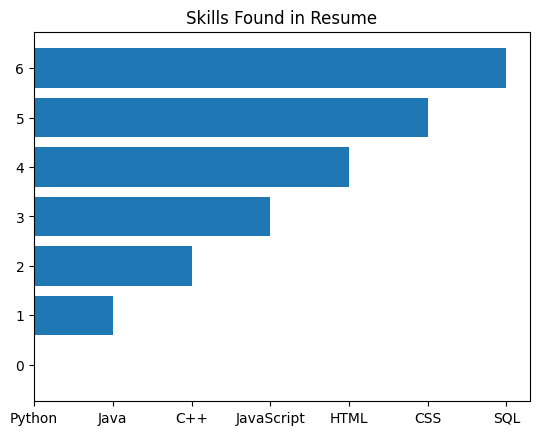

In [17]:
import matplotlib.pyplot as plt

skills = extract_skills(text, common_skills)
plt.barh(range(len(skills)), skills)
plt.title("Skills Found in Resume")
plt.show()

In [18]:
# Upload multiple files
uploaded = files.upload()
all_resumes = {}

for file_name in uploaded.keys():
    if file_name.endswith('.pdf'):
        text = extract_text_from_pdf(file_name)
    elif file_name.endswith('.docx'):
        text = extract_text_from_docx(file_name)
    else:
        continue

    all_resumes[file_name] = {
        "name": extract_name(text),
        "skills": extract_skills(text, common_skills)
    }

print("Comparison Results:")
for name, data in all_resumes.items():
    print(f"\n{name}:")
    print(f"Skills: {', '.join(data['skills'])}")

Saving ritik_s_resume (1).pdf to ritik_s_resume (1).pdf
Comparison Results:

ritik_s_resume (1).pdf:
Skills: Python, Java, C++, JavaScript, HTML, CSS, SQL, Machine Learning, Data Analysis, Problem Solving


In [19]:
def extract_experience(text):
    doc = nlp(text)
    experience = []
    for sent in doc.sents:
        if "experience" in sent.text.lower() or "worked" in sent.text.lower():
            experience.append(sent.text)
    return experience if experience else ["Experience not specified"]

# Add to resume_data
resume_data["experience"] = extract_experience(text)
resume_data["education"] = extract_education(text)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')  # Additional useful data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [21]:
def extract_education_spacy(text):
    doc = nlp(text)
    education = []
    education_keywords = ['bachelor', 'master', 'phd', 'ms', 'bs', 'mba']

    for sent in doc.sents:
        sent_text = sent.text.lower()
        if any(edu_word in sent_text for edu_word in education_keywords):
            # Find organizations (universities) in the same sentence
            orgs = [ent.text for ent in sent.ents if ent.label_ == "ORG"]
            if orgs:
                education.append(f"{sent.text.strip()} ({', '.join(orgs)})")
            else:
                education.append(sent.text.strip())

    return education if education else ["Education information not found"]

In [22]:
# After extracting text...
resume_data = {
    "name": extract_name(text),
    "email": extract_email(text),
    "phone": extract_phone(text),
    "skills": extract_skills(text, common_skills),
    "education": extract_education_spacy(text),  # Using the spaCy version
    "experience": extract_experience(text)
}

print("\n=== Extracted Education ===")
for edu in resume_data["education"]:
    print(f"- {edu}")


=== Extracted Education ===
- Ritik Ranjan
+91 9142599632 |28ritikranjan@gmail.com |http://linkedin.com/in/ritik-ranjan-372710244 |
Education
KIIT University Bhubaneswar, Odisha
Bachelor of Technology in Computer Science Sept. 2022 - Aug. 2026
Mount Assisi School Bhagalpur, Bihar
ICSE(10th) and ISC(12th Science) (Education, KIIT University Bhubaneswar, Mount Assisi School Bhagalpur)
- May 2020 and May 2022
Experience (Virtual Internships)
Machine Learning Intern Aug 2024 – Sep 2024
CodSoft Virtual
•Developed and implemented machine learning models for SMS spam detection and credit card fraud detection,
leveraging data preprocessing, feature engineering, and classification algorithms to enhance accuracy and efficiency. (SMS)
- Full Stack Developer Virual Internship Oct 2024 - Dec 2024
AICTE Virtual Internship by Eduskill
•Gained practical experience in building web applications using Python, integrating frontend and back-end
components
Artificial Intelligence and Machine Learning Inter

In [23]:
# Enhanced name extraction using multiple methods
def extract_name(text):
    # Method 1: spaCy's entity recognition
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            return ent.text

    # Method 2: Pattern matching (looking for title case names at beginning)
    name_match = re.search(r'^([A-Z][a-z]+(?:\s[A-Z][a-z]+)+)', text)
    if name_match:
        return name_match.group(1)

    return "Name not found"

# Enhanced phone number extraction
def extract_phone(text):
    phone_regex = r'(?:(?:\+?(\d{1,3}))?[-. (]*(?:\d{3})[-. )]*(?:\d{3})[-. ]*(?:\d{4})(?: *(?:x|ext|extension)\.? *(\d+))?'
    phones = re.findall(phone_regex, text)
    return [''.join(phone) for phone in phones] if phones else ["Phone not found"]

In [24]:
def detect_sections(text):
    section_headings = {
        'experience': ['experience', 'work history', 'employment'],
        'education': ['education', 'academic background'],
        'skills': ['skills', 'technical skills', 'competencies'],
        'projects': ['projects', 'personal projects']
    }

    sections = {}
    lines = text.split('\n')

    for i, line in enumerate(lines):
        line_lower = line.strip().lower()
        for section, keywords in section_headings.items():
            if any(keyword in line_lower for keyword in keywords):
                # Get content until next section or end
                content = []
                for next_line in lines[i+1:]:
                    if next_line.strip() and not any(keyword in next_line.lower() for keyword in section_headings.keys()):
                        content.append(next_line.strip())
                    else:
                        break
                sections[section] = '\n'.join(content)
                break

    return sections

In [25]:
def parse_full_resume(text):
    sections = detect_sections(text)

    return {
        "personal_info": {
            "name": extract_name(text),
            "email": extract_email(text),
            "phone": extract_phone(text)
        },
        "education": extract_education_spacy(text),
        "experience": sections.get('experience', "No experience section found"),
        "skills": {
            "technical": extract_skills(text, technical_skills),
            "soft": extract_skills(text, soft_skills)
        },
        "projects": sections.get('projects', "No projects section found"),
        "raw_sections": sections
    }

In [26]:
def evaluate_extraction(parsed_data, ground_truth):
    scores = {}
    for field in ['name', 'email', 'phone']:
        scores[field] = 1 if parsed_data['personal_info'][field] == ground_truth[field] else 0

    # For list fields (skills, education)
    for field in ['skills', 'education']:
        extracted = set(x.lower() for x in parsed_data[field])
        actual = set(x.lower() for x in ground_truth[field])
        scores[field] = len(extracted & actual) / len(actual) if actual else 1

    return {**scores, "overall": sum(scores.values())/len(scores)}

In [27]:
def export_resume(data, format='json'):
    if format == 'json':
        import json
        return json.dumps(data, indent=2)
    elif format == 'csv':
        import csv
        output = io.StringIO()
        writer = csv.writer(output)
        writer.writerow(['Field', 'Value'])
        for section, content in data.items():
            if isinstance(content, dict):
                for k, v in content.items():
                    writer.writerow([f"{section}.{k}", str(v)])
            else:
                writer.writerow([section, str(content)])
        return output.getvalue()
    elif format == 'html':
        from jinja2 import Template
        template = Template('''
        <html><body>
        <h1>{{ personal_info.name }}</h1>
        <h2>Contact</h2>
        <p>Email: {{ personal_info.email }}</p>
        <!-- More HTML template -->
        </body></html>''')
        return template.render(**data)

In [28]:
def process_resume_folder(folder_path):
    results = []
    for file in os.listdir(folder_path):
        if file.endswith(('.pdf', '.docx')):
            try:
                if file.endswith('.pdf'):
                    text = extract_text_from_pdf(os.path.join(folder_path, file))
                else:
                    text = extract_text_from_docx(os.path.join(folder_path, file))

                results.append({
                    "filename": file,
                    "data": parse_full_resume(text),
                    "status": "success"
                })
            except Exception as e:
                results.append({
                    "filename": file,
                    "error": str(e),
                    "status": "failed"
                })
    return results

In [29]:
# Example with SQLite
import sqlite3

def save_to_db(resume_data):
    conn = sqlite3.connect('resumes.db')
    c = conn.cursor()
    c.execute('''CREATE TABLE IF NOT EXISTS resumes
                 (name text, email text, skills text, education text)''')
    c.execute("INSERT INTO resumes VALUES (?,?,?,?)",
              (resume_data['personal_info']['name'],
               resume_data['personal_info']['email'],
               ','.join(resume_data['skills']['technical']),
               '\n'.join(resume_data['education'])))
    conn.commit()
    conn.close()

In [30]:
# Train a model to classify resume sections
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

def train_section_classifier(labeled_data):
    # labeled_data = [{"text": "Education\nMS in CS...", "label": "education"}, ...]
    texts = [x["text"] for x in labeled_data]
    labels = [x["label"] for x in labeled_data]

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(texts)

    model = LogisticRegression()
    model.fit(X, labels)

    return vectorizer, model

In [31]:
# FastAPI example
from fastapi import FastAPI, UploadFile
from fastapi.responses import JSONResponse

app = FastAPI()

@app.post("/parse-resume")
async def parse_resume(file: UploadFile):
    contents = await file.read()
    # Add processing logic here
    return JSONResponse(parse_full_resume(contents))

ModuleNotFoundError: No module named 'fastapi'

In [32]:
!pip install fastapi uvicorn python-multipart
!pip install python-docx PyPDF2 pdf2image pytesseract spacy nltk
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [33]:
from fastapi import FastAPI, UploadFile, File, HTTPException
from fastapi.responses import JSONResponse
import io
import os
from typing import Dict, Any
from docx import Document
from PyPDF2 import PdfReader
from pdf2image import convert_from_path
import pytesseract
import spacy
import re

# Initialize NLP model
nlp = spacy.load('en_core_web_sm')

app = FastAPI(title="Resume Parser API")

# Text extraction functions
async def extract_text_from_pdf(file: UploadFile):
    pdf_reader = PdfReader(io.BytesIO(await file.read()))
    text = ""
    for page in pdf_reader.pages:
        text += page.extract_text() or ""
    return text

async def extract_text_from_docx(file: UploadFile):
    doc = Document(io.BytesIO(await file.read()))
    return "\n".join([paragraph.text for paragraph in doc.paragraphs])

# Information extraction functions
def extract_name(text: str) -> str:
    doc = nlp(text)
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            return entity.text
    return "Name not found"

def extract_email(text: str) -> str:
    email = re.findall(r'[\w\.-]+@[\w\.-]+', text)
    return email[0] if email else "Email not found"

@app.post("/parse-resume", response_model=Dict[str, Any])
async def parse_resume(file: UploadFile = File(...)):
    try:
        if file.filename.endswith('.pdf'):
            text = await extract_text_from_pdf(file)
        elif file.filename.endswith('.docx'):
            text = await extract_text_from_docx(file)
        else:
            raise HTTPException(status_code=400, detail="Unsupported file format")

        result = {
            "filename": file.filename,
            "name": extract_name(text),
            "email": extract_email(text),
            "success": True
        }
        return JSONResponse(content=result)

    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

In [35]:
!pip install nest_asyncio pyngrok

In [38]:
!apt-get install poppler-utils tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
poppler-utils is already the newest version (22.02.0-2ubuntu0.8).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [51]:
import nest_asyncio
from pyngrok import ngrok
import uvicorn

# Required for running in notebook
nest_asyncio.apply()

# Set your ngrok authtoken (replace 'YOUR_AUTHTOKEN' with your actual token)
ngrok.set_auth_token("2xl1GEWUFL4jBHceqKm1zhreUpi_L9Fi7L3A948DA6Hux5x3")

# Start the server
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
uvicorn.run(app, host='0.0.0.0', port=8000)

Public URL: https://a140-34-125-38-184.ngrok-free.app


INFO:     Started server process [669]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     2409:40e4:1341:8709:c77:b76d:19bc:cc43:0 - "GET / HTTP/1.1" 200 OK
INFO:     2409:40e4:1341:8709:c77:b76d:19bc:cc43:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [669]
